# <b> Notebook 3 : Classification model exploration

In [1]:
# Import packages, functions
%run ../klicp/klicp_00_import_and_functions.ipynb
%run ../klicp/klicp_01_data_import_tools.ipynb
%run ../klicp/klicp_04_algo_exploration_tools.ipynb

# Import dataframes
%run 01_processing.ipynb

In [2]:
%run ../code_patrimony/00_functions.ipynb

## Overview of a few model's performance

#### Let's compare a few algorithms that can be used for classification to see the performance of each ones.

Logistic Regression Algotithm 	 Accuracy: 0.837 	 F-score: 0.837 	 Overall: 0.837
Linear Discriminant Analysis 	 Accuracy: 0.832 	 F-score: 0.831 	 Overall: 0.831
Decision Tree 		 	 Accuracy: 0.961 	 F-score: 0.961 	 Overall: 0.961
Random Forest 		 	 Accuracy: 0.975 	 F-score: 0.975 	 Overall: 0.975
Gradient Boosting 	 	 Accuracy: 0.867 	 F-score: 0.867 	 Overall: 0.867
XGBoost Classifier 	 	 Accuracy: 0.967 	 F-score: 0.967 	 Overall: 0.967
Support Vector Classification 	 Accuracy: 0.873 	 F-score: 0.873 	 Overall: 0.873
Naive Bayes Classification 	 Accuracy: 0.705 	 F-score: 0.694 	 Overall: 0.7
K Nearest Neighbour Algorithm 	 Accuracy: 0.894 	 F-score: 0.894 	 Overall: 0.894
Stochastic Gradient Descent 	 Accuracy: 0.838 	 F-score: 0.837 	 Overall: 0.837


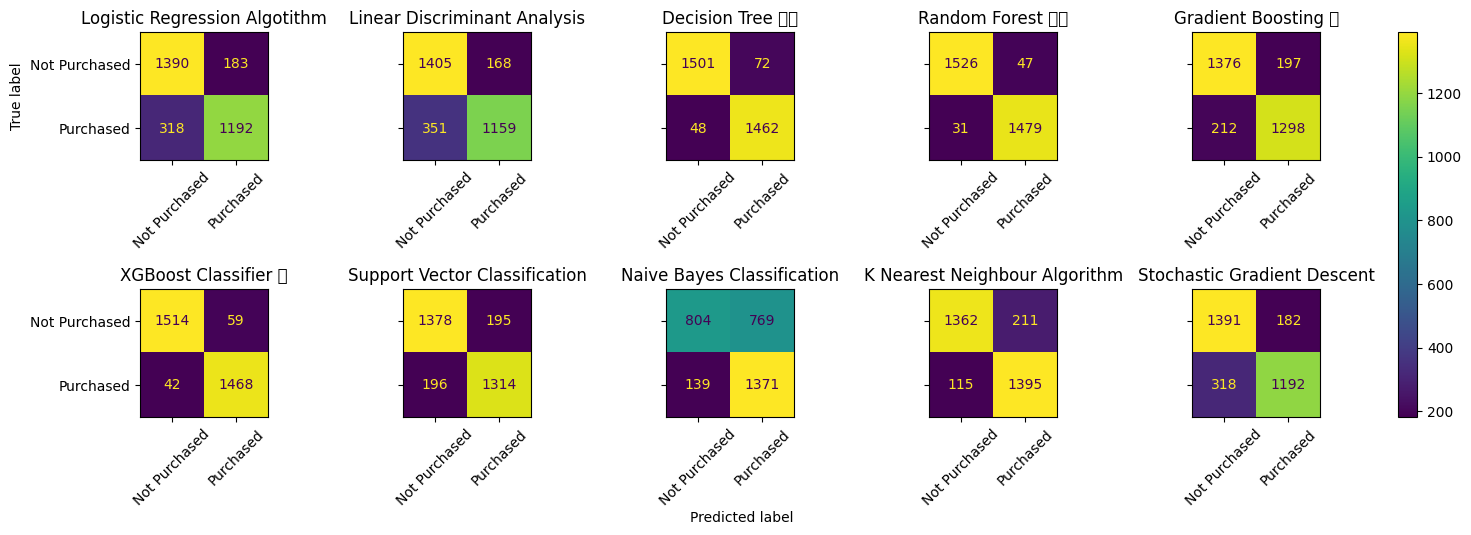

In [3]:
names, accuracies, f_scores, confusion_matrixes = compare_class_algo(classifiers, X_train, X_test, y_train, y_test, True, ["Not Purchased","Purchased"])

#### The best performing algorithms are Decition Tree / Random Forest and XGBoost Classifier. We can focus on these 3 algorithms and tune its hyperparameters to achive the best results

In [4]:
model = RandomForestClassifier() 
model.fit(X_train,y_train)

RandomForestClassifier()

In [5]:
y_pred = model.predict(X_test)

In [6]:
def simple_fex(model, X_train, mode):
    if type(model) in [LinearRegression, Ridge, SGDRegressor, Lasso, ElasticNet, SVR]:
        explainer = shap.Explainer(model,X_train)
    elif type(model) in [XGBRegressor, XGBClassifier, RandomForestClassifier, RandomForestRegressor]:
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.Explainer(model)
        
    shap_obj = explainer(X_train)
    shap.summary_plot(shap_obj, X_train)
    #shap.plots.beeswarm(shap_val)
    feature_names = X_train.columns
    shap_df = pd.DataFrame(shap_obj.values, columns=feature_names)
    vals = np.abs(shap_df.values).mean(0)
    shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
    return shap_importance

TypeError: only integer scalar arrays can be converted to a scalar index

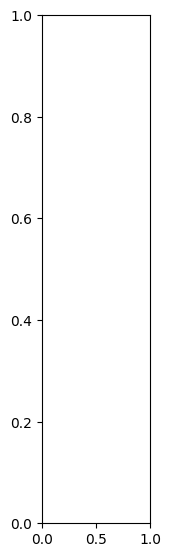

In [7]:
simple_fex(model, X_train, 'Tree')